#Customer Clustering with PCA, KMeans and Agglomerative for a Marketing Campaign


Introduction

This notebook provides an overview of the steps taken to process and explore the data in the marketing campaign data. The code uses Pandas and Plotly Express for data preprocessing, visualization, and exploration. The code also uses scikit-learn for dimensionality reduction using PCA and for clustering using KMeans and Agglomerative Clustering.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('marketing_campaign-exel.xlsx')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [7]:
df=df.dropna()

In [8]:
df.duplicated().sum()

0

#Outliers

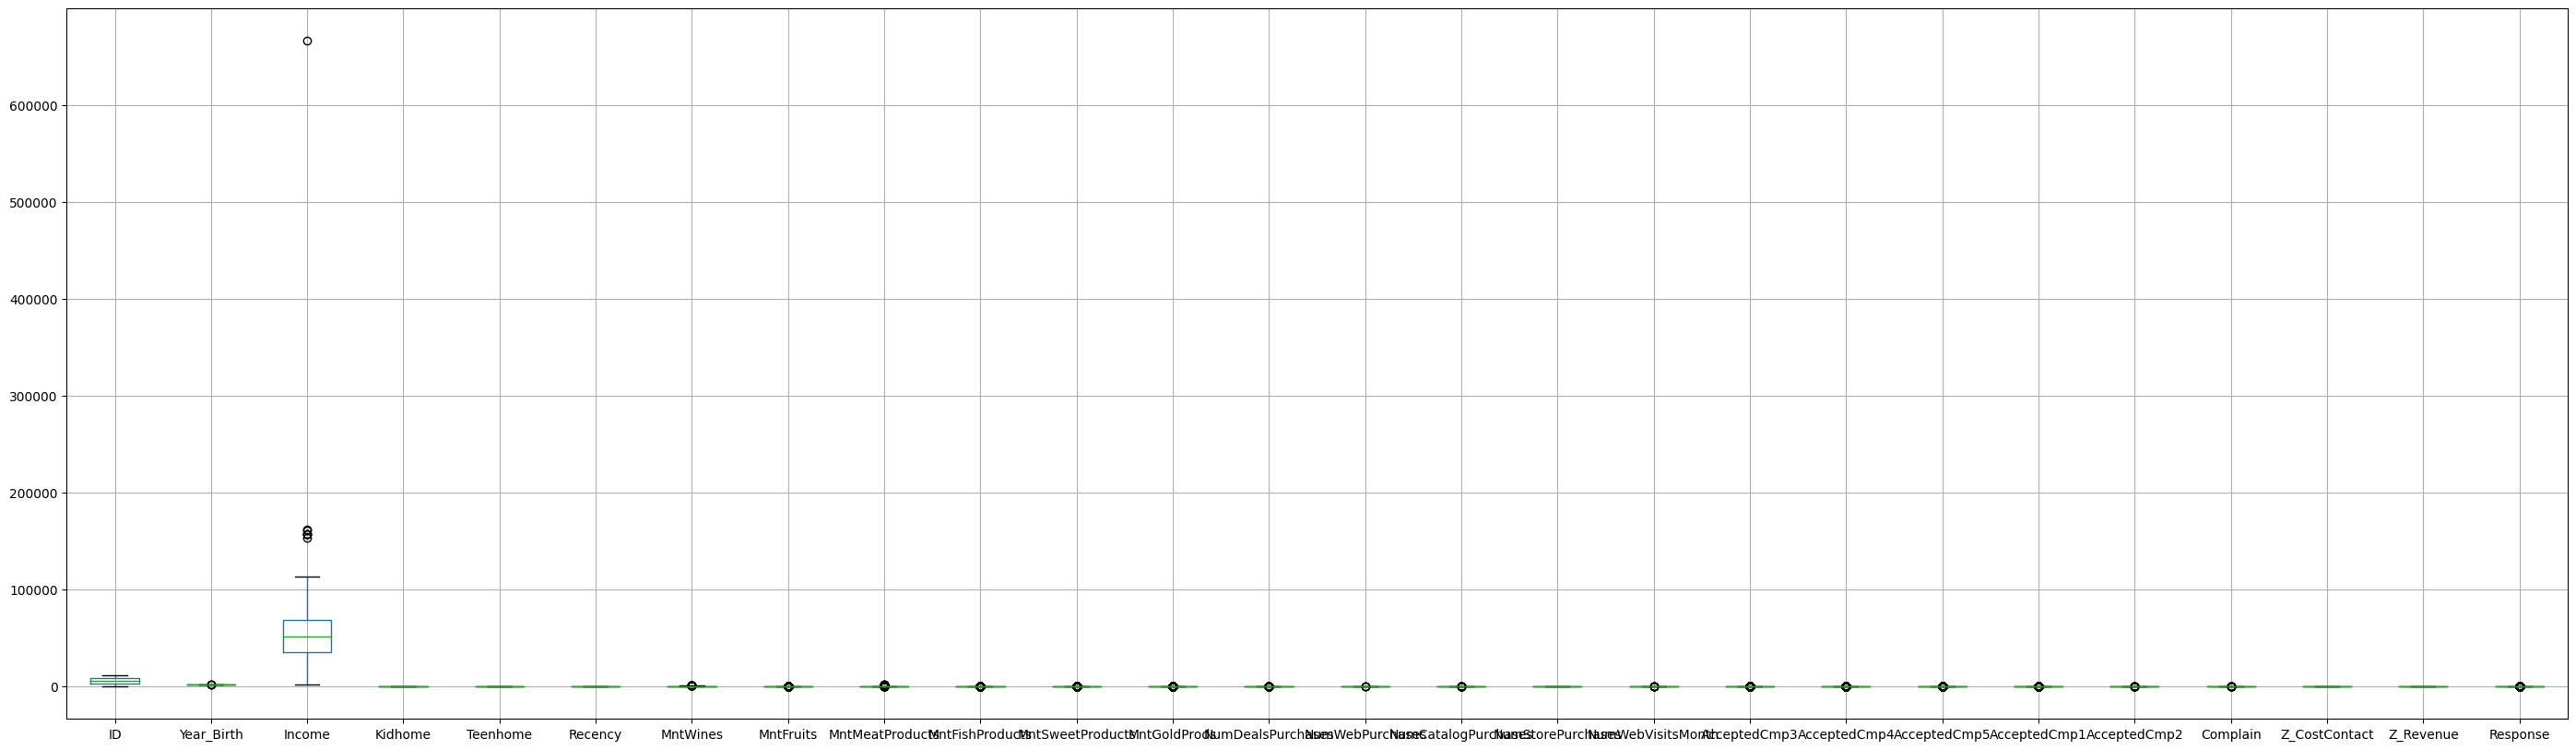

In [9]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(35, 10))

# Plot the box plots for all columns
df.boxplot(ax=ax)

# Show the plot
plt.show()

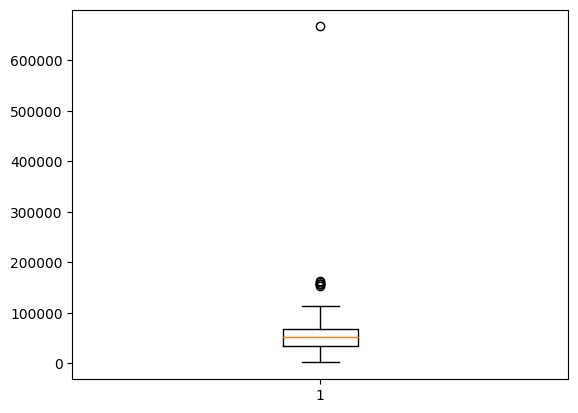

In [10]:
# Plot the distribution of a column to visualize the outliers
plt.boxplot(df['Income'])
plt.show()

In [11]:
# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Number of outliers in the Income column: 8


In [12]:
# Remove the outliers in the Income column
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

# Print the updated shape of the dataframe
df.shape

(2208, 29)

#Feature engineering
Creating new features/ columns

In [13]:
print("Unique values in Education column:",df['Education'].unique())
print("Unique values in Martial Status column:",df['Marital_Status'].unique())

Unique values in Education column: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in Martial Status column: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [14]:
#Creating Age
df['Age']=2024-df['Year_Birth']

In [15]:
#Creating Total number of campaigns accepted
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

#Creating Total spend:
df['Total_Spend'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1))

# create new feature for total spending in the last 2 years
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['Total_purchases'] =(df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1))



In [16]:
Qhigh = np.quantile(df['NumWebVisitsMonth'], 0.99)
Qlow = np.quantile(df['NumWebVisitsMonth'], 0.01)
median = np.quantile(df['NumWebVisitsMonth'], 0.5)
print(Qhigh, Qlow, median)

df['NumWebVisitsMonth'] = df['NumWebVisitsMonth'].apply(lambda x: x if x <= Qhigh and x>=Qlow else
                                                           Qlow if x < Qlow else median)

9.0 1.0 6.0


In [17]:
# Define the mapping dictionary
education_mapping = {
    'Basic': 0,
    'Graduation': 1,
    'Master': 2,
    '2n Cycle': 2,
    'PhD': 3
}

# Replace the education levels with their corresponding numeric values
df['Education'] = df['Education'].replace(education_mapping)

# Display the updated DataFrame
print(df)

         ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524        1957          1         Single  58138.0        0         0   
1      2174        1954          1         Single  46344.0        1         1   
2      4141        1965          1       Together  71613.0        0         0   
3      6182        1984          1       Together  26646.0        1         0   
4      5324        1981          3        Married  58293.0        1         0   
...     ...         ...        ...            ...      ...      ...       ...   
2235  10870        1967          1        Married  61223.0        0         1   
2236   4001        1946          3       Together  64014.0        2         1   
2237   7270        1981          1       Divorced  56981.0        0         0   
2238   8235        1956          2       Together  69245.0        0         1   
2239   9405        1954          3        Married  52869.0        1         1   

     Dt_Customer  Recency  

<ipython-input-17-1f51dc21072d>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'] = df['Education'].replace(education_mapping)


<ipython-input-18-965b4f8d6ef8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x = 'Education', palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1

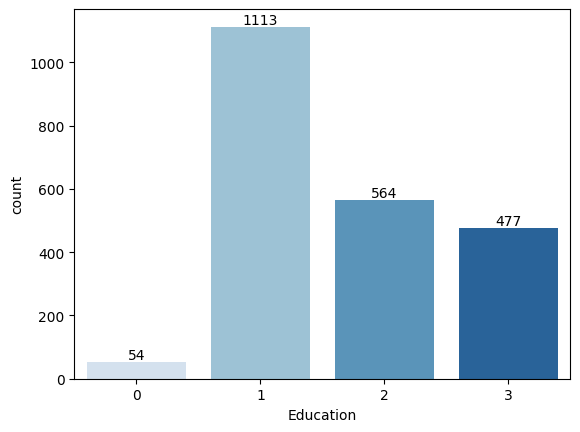

In [18]:
import seaborn as sns
ax = sns.countplot(data=df, x = 'Education', palette='Blues')
for i in ax.containers:
    ax.bar_label(i, )

In [47]:
cat_features = [x for x in cat_features if x not in camps]
cat_features.append('Education')

In [19]:
#Marital_Status

map_marital = {
    'Alone' : 0,
    'YOLO' : 0,
    'Absurd' : 0,
    'Widow' : 0,
    'Divorced' : 0,
    'Single' : 0,
    'Together' : 1,
    'Married' : 2
}

# Replace the education levels with their corresponding numeric values
df['Marital_Status'] = df['Marital_Status'].replace(map_marital)

# Display the updated DataFrame
print(df)

         ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
0      5524        1957          1               0  58138.0        0   
1      2174        1954          1               0  46344.0        1   
2      4141        1965          1               1  71613.0        0   
3      6182        1984          1               1  26646.0        1   
4      5324        1981          3               2  58293.0        1   
...     ...         ...        ...             ...      ...      ...   
2235  10870        1967          1               2  61223.0        0   
2236   4001        1946          3               1  64014.0        2   
2237   7270        1981          1               0  56981.0        0   
2238   8235        1956          2               1  69245.0        0   
2239   9405        1954          3               2  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Complain  \
0            0  2012-09-04       58       635  ...       

<ipython-input-19-b4a690ba575a>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Marital_Status'] = df['Marital_Status'].replace(map_marital)


<ipython-input-20-2324547014de>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x = 'Marital_Status', palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a len

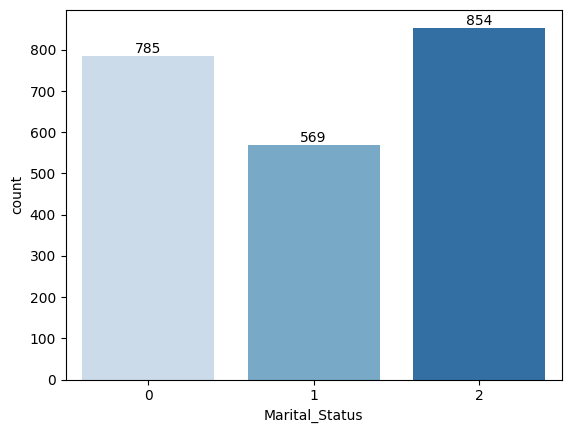

In [20]:
ax = sns.countplot(data=df, x = 'Marital_Status', palette='Blues')
for i in ax.containers:
    ax.bar_label(i, )

In [42]:
cat_features = [x for x in cat_features if x not in camps]
cat_features.append('Marital_Status')

#Campaign features
In previous steps, we saw the similaritys of AcceptedCmp features. I will group them to get a new feature with 2 labels (0, 1) which mean:

0 user did not accept any offer.

1 user accepted at least one offer.

In [21]:
camps = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

def group_campaign(df): # Pass the DataFrame as an argument

    return [1 if x else 0 for x in np.any(df[camps], axis=1)]

# Assuming 'df' is your DataFrame
print(len(group_campaign(df))) # Call the function with your DataFrame

2208


In [22]:
camps = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

def group_campaign(df):
    return [1 if x else 0 for x in np.any(df[camps], axis=1)]

df['Campaign'] = group_campaign(df)

# Initialize cat_features before using it in the list comprehension
cat_features = []  # or a list of your existing categorical features if you have any

# Exclude campaign-related features from cat_features and add the new 'Campaign' feature
cat_features = [x for x in cat_features if x not in camps]
cat_features.append('Campaign')

In [23]:
df[camps + ['Campaign']].head(5)


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Campaign
0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


<ipython-input-24-0ca1c96bac6e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Campaign', palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


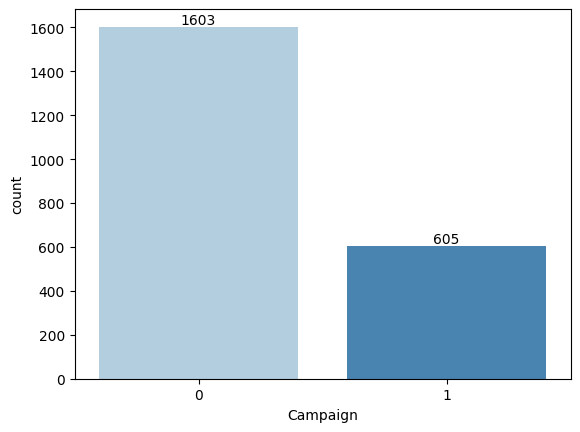

In [24]:
ax = sns.countplot(data=df, x='Campaign', palette='Blues')
for i in ax.containers:
    ax.bar_label(i,)

In [25]:
if 'Complain' in cat_features:
    cat_features.remove('Complain')
else:
    print("Warning: 'Complain' not found in cat_features. Skipping removal.")

#This feature is highly skewed. I should remove it.

Kids

In [26]:
import numpy as np #Make sure to have numpy imported

kids = ['Kidhome', 'Teenhome']

def group_kids(df):
    return [1 if x else 0 for x in np.any(df[kids], axis=1)]

# Assuming your dataframe is named 'df':
print(len(group_kids(df))) # Call the function with your dataframe

2208


In [27]:
df['Kids'] = group_kids(df) # Pass the 'df' dataframe to the function
cat_features = [x for x in cat_features if x not in kids]
cat_features.append('Kids')

<ipython-input-28-c698bf5d350e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Kids', palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


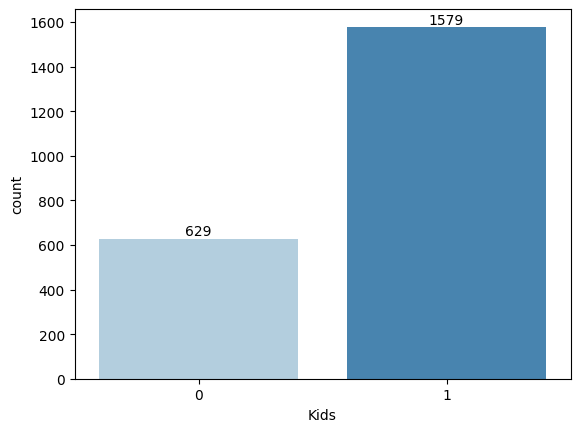

In [28]:
ax = sns.countplot(data=df, x='Kids', palette='Blues')
for i in ax.containers:
    ax.bar_label(i,)

In [48]:
num_features=['Age', 'Income', 'Total_Campaigns_Accepted', 'Total_Spend','Recency', 'NumWebVisitsMonth','Total_purchases']

df2 = df[cat_features+num_features].copy()
processed_data = df2.copy()
processed_data.head()

,Campaign,Kids,Marital_Status,Education,Age,Income,Total_Campaigns_Accepted,Total_Spend,Recency,NumWebVisitsMonth,Total_purchases
0,1,0,0,1,67,58138.0,0,1617,58,7.0,25
1,0,1,0,1,70,46344.0,0,27,38,5.0,6
2,0,0,1,1,59,71613.0,0,776,26,4.0,21
3,0,1,1,1,40,26646.0,0,53,26,6.0,8
4,0,1,2,3,43,58293.0,0,422,94,5.0,19


<Axes: >

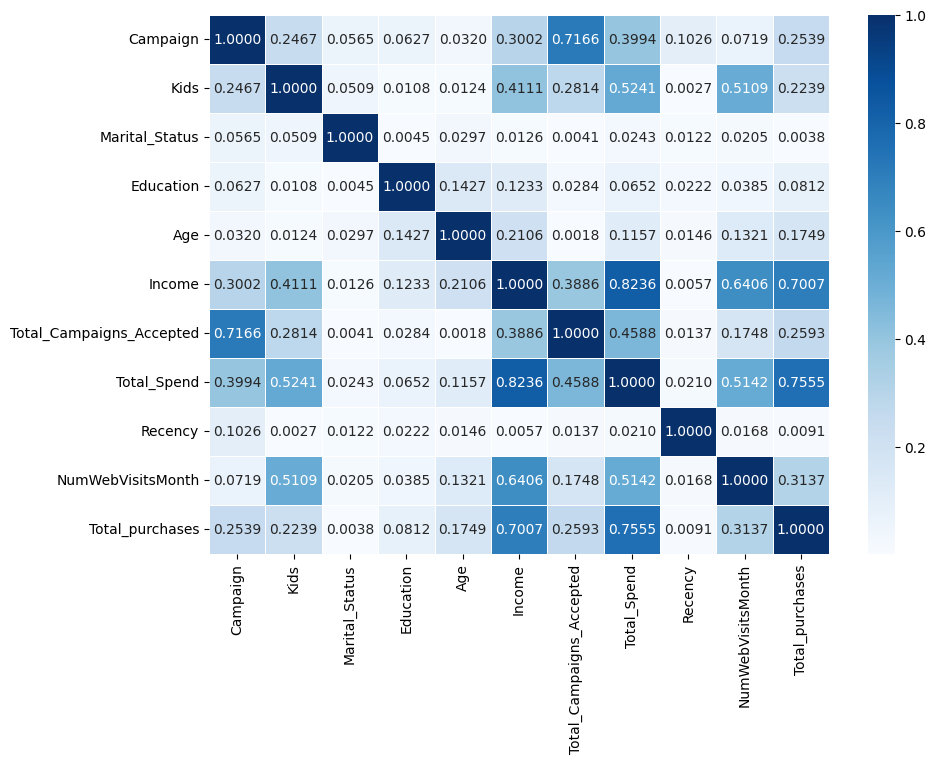

In [49]:
#correlation

correlation_matrix = df2[cat_features+num_features].corr()
correlation_matrix = correlation_matrix.apply(lambda x: np.abs(x))
plt.figure(figsize=(10,7))
sns.heatmap(data=correlation_matrix, annot=True, fmt='.4f', cmap='Blues', linewidths=.5, annot_kws={"size": 10})


Data scaling

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
processed_data[num_features] = scaler.fit_transform(processed_data[num_features])

In [51]:
processed_data.head()

,Campaign,Kids,Marital_Status,Education,Age,Income,Total_Campaigns_Accepted,Total_Spend,Recency,NumWebVisitsMonth,Total_purchases
0,1,0,0,1,0.984809,0.314089,-0.440214,1.678075,0.310588,0.755541,1.329209
1,0,1,0,1,1.235034,-0.255431,-0.440214,-0.963323,-0.380686,-0.125724,-1.166113
2,0,0,1,1,0.317541,0.964782,-0.440214,0.280959,-0.795450,-0.566356,0.803878
3,0,1,1,1,-1.267219,-1.206626,-0.440214,-0.920130,-0.795450,0.314908,-0.903448
4,0,1,2,3,-1.016993,0.321573,-0.440214,-0.307126,1.554881,-0.125724,0.541212


Feature extraction

In [54]:
from sklearn.decomposition import PCA
high_corr = ['Income', 'NumWebVisitsMonth', 'Total_Spend', 'Total_purchases']

pca=PCA()
pca_data= pca.fit_transform(processed_data[high_corr])

<ipython-input-55-d785d61ee427>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = pca_label, y = pca_var, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1

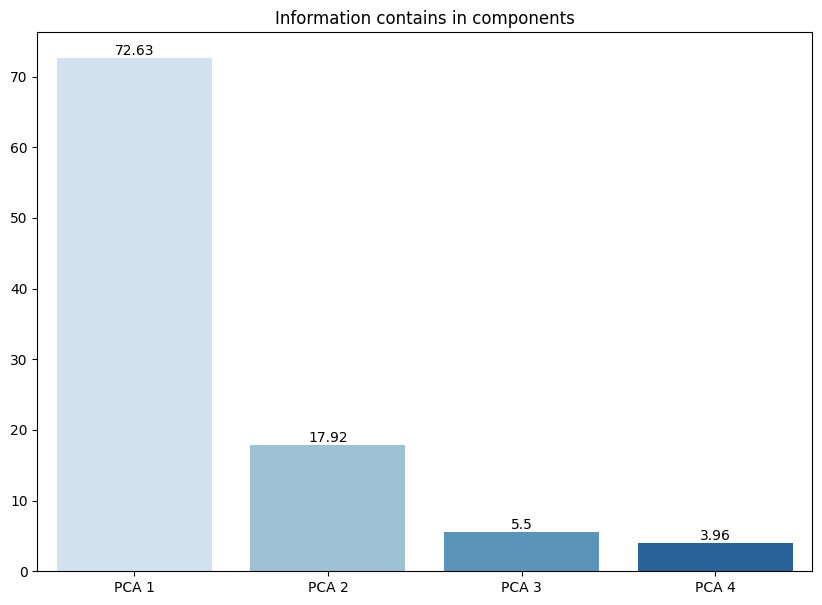

In [55]:
pca_var = np.round(pca.explained_variance_ratio_*100, 2)
pca_label = np.array([f'PCA {i+1}' for i in range(len(pca_var))])
plt.figure(figsize=(10, 7))
ax = sns.barplot(x = pca_label, y = pca_var, palette='Blues')
plt.title('Information contains in components')
for i in ax.containers:
    ax.bar_label(i, )

In [69]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=pca_data,columns=['pca1','pca2','pca3','pca4'])
pca_df.sample(5)

,pca1,pca2,pca3,pca4
138,-0.509450,-1.457199,0.207504,0.222124
777,-0.482730,-1.361004,0.303910,0.057744
1648,2.619215,-0.742836,-0.664401,-0.033635
1282,-2.107757,-0.140405,0.671933,-0.986024
287,1.331929,0.919666,0.841514,-0.113642


Text(0.5, 1.0, 'weights of feature on compnents')

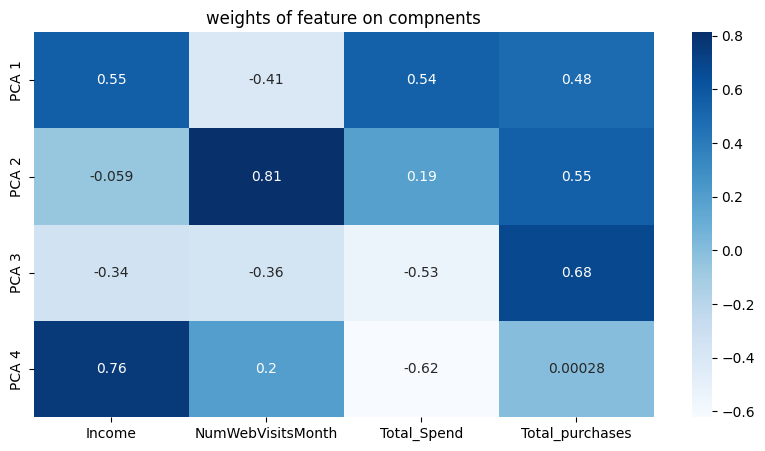

In [56]:
pca_df = pd.DataFrame(pca.components_, columns= high_corr, index=pca_label)
plt.figure(figsize=(10, 5))
sns.heatmap(pca_df, cmap='Blues', annot=True)
plt.title('weights of feature on compnents')

<Axes: xlabel='Interest', ylabel='Density'>

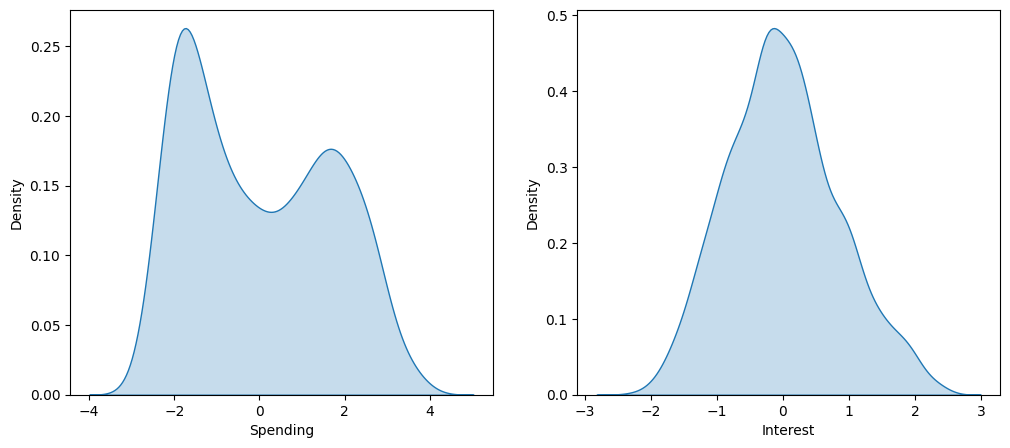

In [57]:
processed_data['Spending'] = pca_data[:, 0]
processed_data['Interest'] = pca_data[:, 1]

processed_data.drop(high_corr, axis=1, inplace=True)

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
sns.kdeplot(processed_data['Spending'], ax=axs[0], fill=True)
sns.kdeplot(processed_data['Interest'], ax=axs[1], fill=True)

In [58]:
processed_data.head()

,Campaign,Kids,Marital_Status,Education,Age,Total_Campaigns_Accepted,Recency,Spending,Interest
0,1,0,0,1,0.984809,-0.440214,0.310588,1.414953,1.637852
1,0,1,0,1,1.235034,-0.440214,-0.380686,-1.175643,-0.906017
2,0,0,1,1,0.317541,-0.440214,-0.795450,1.305722,-0.024577
3,0,1,1,1,-1.267219,-0.440214,-0.795450,-1.729710,-0.339800
4,0,1,2,3,-1.016993,-0.440214,1.554881,0.324869,0.117811


#Clustering Data

K-means clustering

K-means is a popular algorithm for clustering problem.

In [59]:
from sklearn.cluster import KMeans

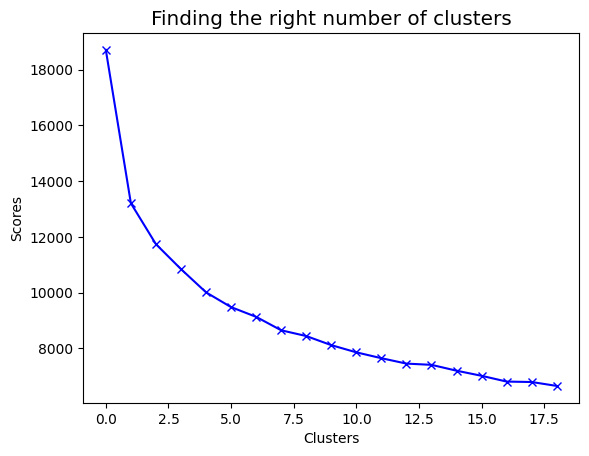

In [61]:
scores_1 = []

range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(processed_data)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1, 'bx-')
plt.style.use('ggplot')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

→ Best k in this situation is 2.



In [62]:
kmeans = KMeans(n_clusters=2, random_state=63, n_init=50)
cluster_labels = kmeans.fit_predict(processed_data)

In [65]:
df2.head(3)

,Campaign,Kids,Marital_Status,Education,Age,Income,Total_Campaigns_Accepted,Total_Spend,Recency,NumWebVisitsMonth,Total_purchases
0,1,0,0,1,67,58138.0,0,1617,58,7.0,25
1,0,1,0,1,70,46344.0,0,27,38,5.0,6
2,0,0,1,1,59,71613.0,0,776,26,4.0,21


In [66]:
df2['cluster'] = cluster_labels
df2.head()

,Campaign,Kids,Marital_Status,Education,Age,Income,Total_Campaigns_Accepted,Total_Spend,Recency,NumWebVisitsMonth,Total_purchases,cluster
0,1,0,0,1,67,58138.0,0,1617,58,7.0,25,1
1,0,1,0,1,70,46344.0,0,27,38,5.0,6,0
2,0,0,1,1,59,71613.0,0,776,26,4.0,21,1
3,0,1,1,1,40,26646.0,0,53,26,6.0,8,0
4,0,1,2,3,43,58293.0,0,422,94,5.0,19,0


<ipython-input-67-ccc213e48d43>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df2, x = 'cluster', palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


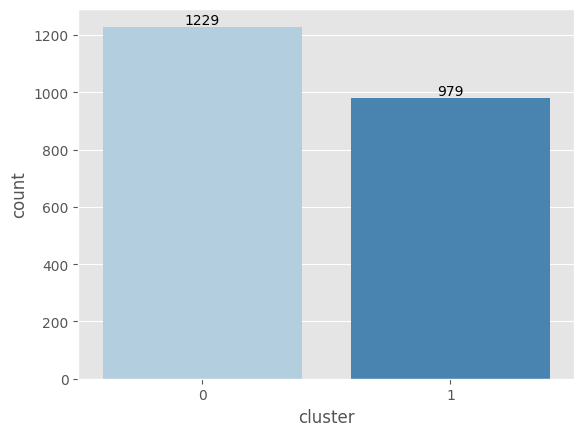

In [67]:
ax = sns.countplot(data=df2, x = 'cluster', palette='Blues')
for i in ax.containers:
    ax.bar_label(i, )

Clusters analysis


Distribution

In [72]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':cluster_labels})], axis = 1)
pca_df.head()

,pca1,pca2,pca3,pca4,cluster
0,1.414953,1.637852,-0.371797,-0.655242,1
1,-1.175643,-0.906017,-0.146770,0.379890,0
2,1.305722,-0.024577,0.270112,0.445247,1
3,-1.729710,-0.339800,0.177847,-0.281033,0
4,0.324869,0.117811,0.467900,0.410004,0


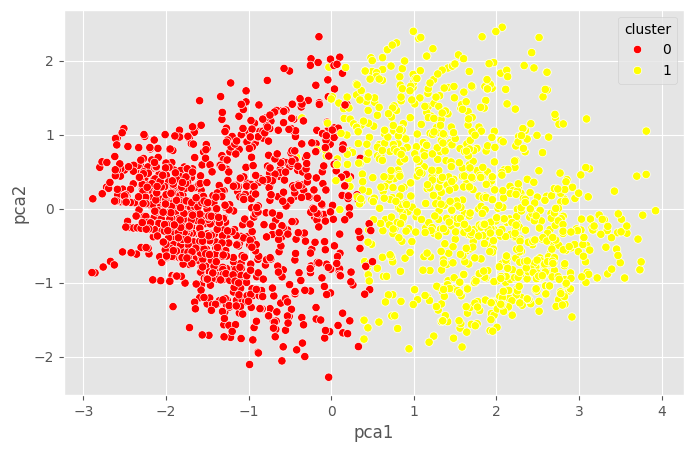

In [73]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','yellow'])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

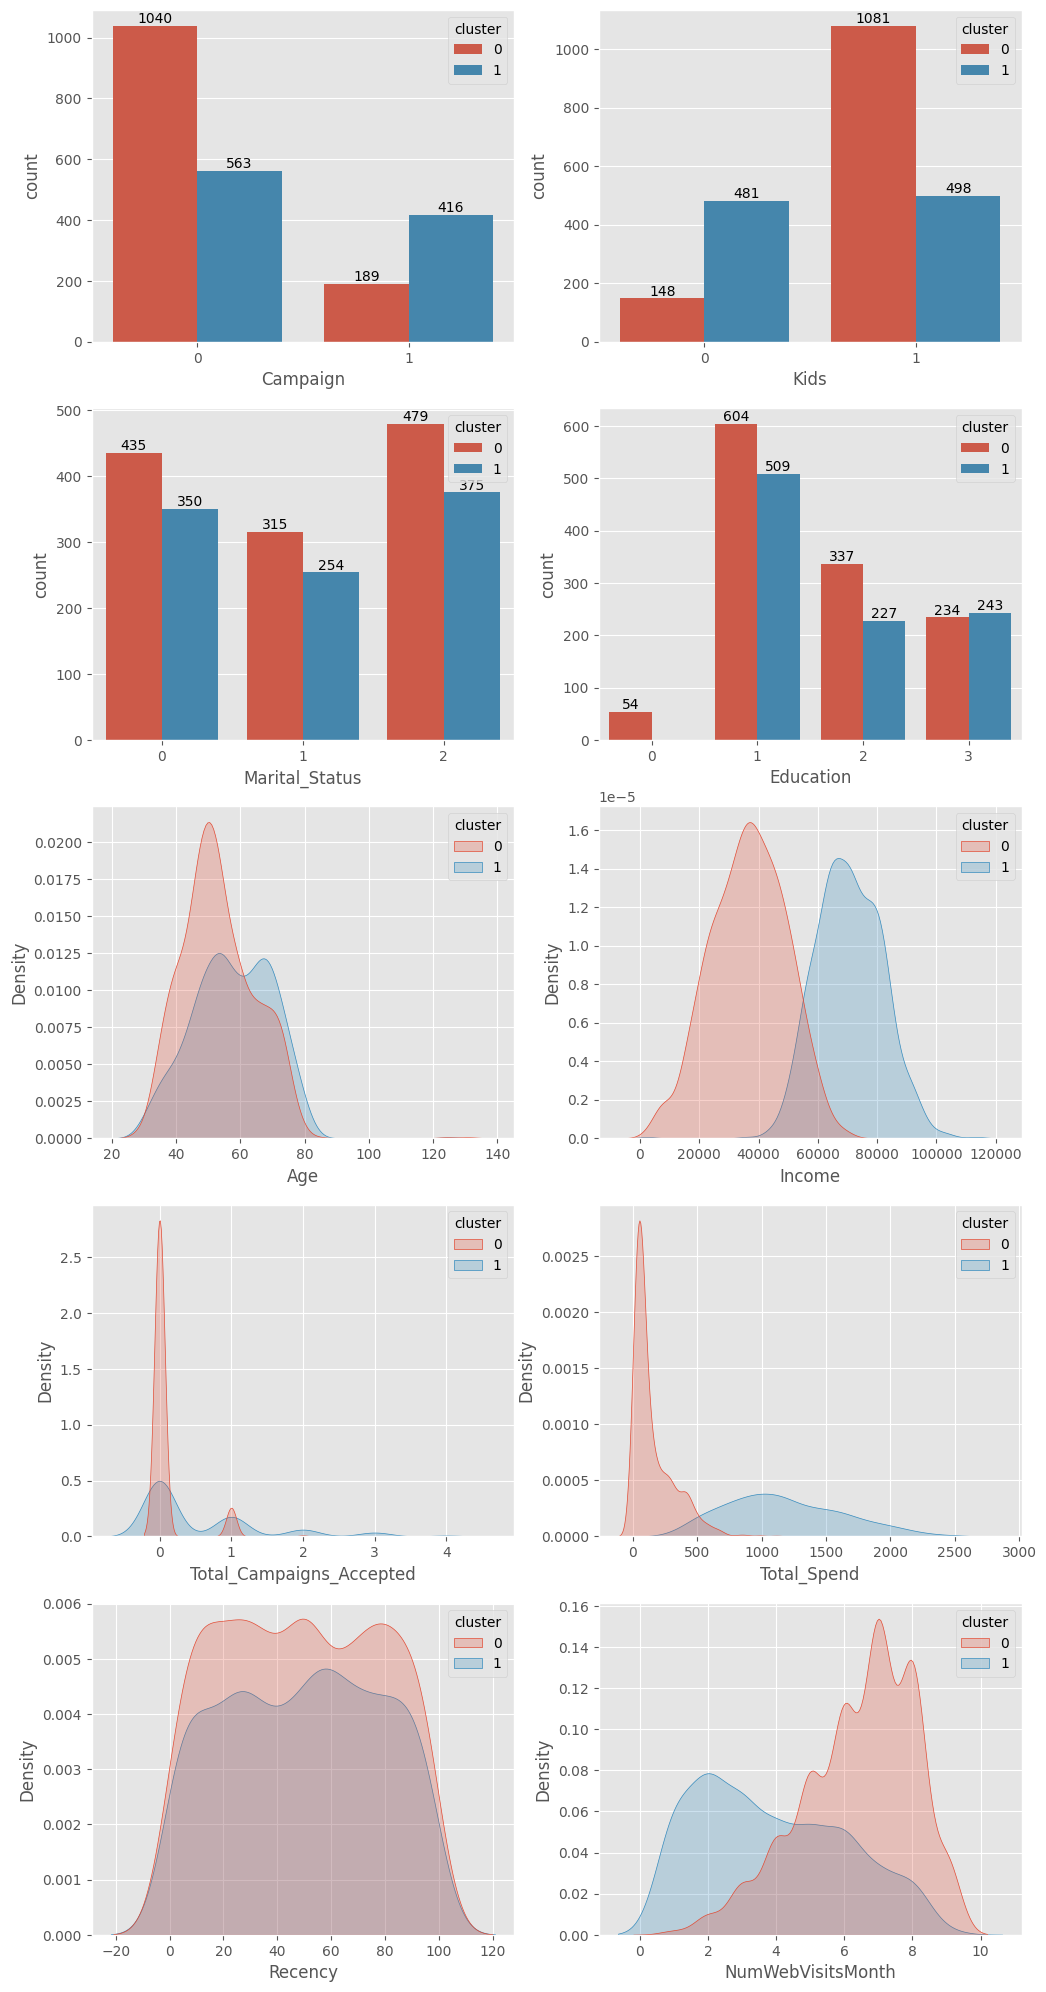

In [68]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 25))
for i in range(2):
    for j in range(2):
        ax = sns.countplot(data=df2, x=cat_features[i*2 + j], hue='cluster', ax=axs[i, j])
        for x in ax.containers:
            ax.bar_label(x, )
for i in range(2, 5):
    for j in range(2):
        ax = sns.kdeplot(data=df2, x=num_features[(i-2)*2 + j], hue='cluster', fill=True, ax=axs[i, j])
        for x in ax.containers:
            ax.bar_label(x, )

**Conclusion**

+There are some differences between distributions of features according to the cluster which they are assigned to.

**Education feature:**

The basic-education only belong to cluster 0.
Phd-education ratio of cluster 0 is slightly greater than cluster 1.
Marital_Status feature has similar distribution within 2 clusters.

+**Campaign** cluster 0 is highly skewed to label 'did not accept any offer previously'.

+**Kids** feature on cluster 0 prove that most people in this cluster has at least 1 child. While distribution on cluster 1 is pretty balance.

+**Income** has well separated in distribution of clusters.

Cluster 1 has right skewed.
Cluster 0 has left skewed.
**Recency** may not be impacted by cluster.

**NumWebVisitsMonth**, Total_spend, Total_purchases provided some specific distribution meaning of each clusters.

cluster 1 has slightly higher mean Age than cluster 0



**Cluster meaning¶**

Cluster 0: users with low purchase capacity

Cluster 1: users with high purchase capacity
